<a href="https://colab.research.google.com/github/YoloA11000/Metodos-Numericos/blob/main/Nodos%20de%20Chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nodos de Chebyshev
Los nodos de Chebyshev son puntos dentro de un intervalo $[a,b]$, calculados de forma que están más densamente agrupados cerca de los extremos del intervalo. Esto ayuda a minimizar el error de interpolación.

Los nodos de Chebyshev de primer tipo en el intervalo $[-1, 1]$ se definen así:

$$
x_i = \cos\left( \frac{2i - 1}{2n} \pi \right), \quad \text{para } i = 1, 2, \ldots, n
$$

Si se desea cambiar al intervalo $[a, b]$, se aplica una transformación lineal:

$$
x_i^{[a,b]} = \frac{a + b}{2} + \frac{b - a}{2} \cdot x_i
$$
## Interpolación de Lagrange

El polinomio de interpolación de Lagrange para una función $f(x)$, dados los nodos $x_0, x_1, \ldots, x_n$, se define como:

$$
P(x) = \sum_{j=0}^{n} f(x_j) \cdot \ell_j(x)
$$

donde los polinomios básicos de Lagrange $\ell_j(x)$ están dados por:

$$
\ell_j(x) = \prod_{\substack{i=0 \\ i \ne j}}^{n} \frac{x - x_i}{x_j - x_i}
$$

Este polinomio $P(x)$ pasa exactamente por los puntos dados $(x_j, f(x_j))$.

##Ejemplo típico: función de Runge

Una función clásica para estudiar este problema es la función de Runge:
$$
f(x) = \frac{1}{1 + 25x^2}
$$

Esta función produce grandes errores al interpolarse con nodos equiespaciados, pero mejora mucho con nodos de Chebyshev.


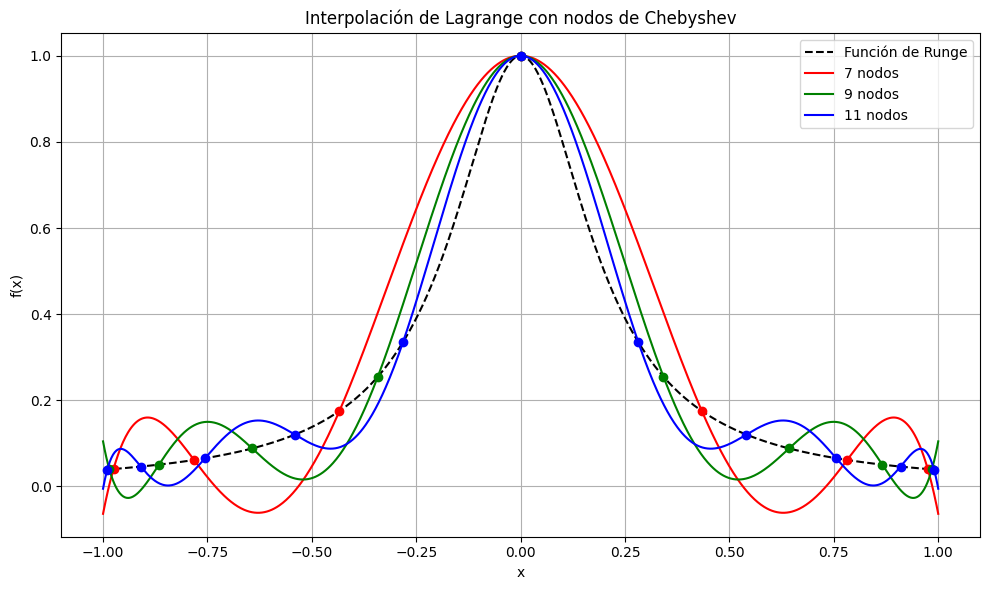

In [2]:
# Importo las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Defino la función de Runge: f(x) = 1 / (1 + 25x^2)
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Función que calcula los n nodos de Chebyshev en el intervalo [a, b]
def chebyshev_nodes(a, b, n):
    i = np.arange(1, n + 1)  # Índices del 1 al n
    x_cheb = np.cos((2 * i - 1) * np.pi / (2 * n))  # Nodos en [-1, 1]
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb   # Escalado a [a, b]

# Intervalo de evaluación para graficar la función y la interpolación
x_vals = np.linspace(-1, 1, 1000)
f_vals = runge_function(x_vals)

# Lista con distintas cantidades de nodos a probar
node_counts = [7, 9, 11]
colors = ['red', 'green', 'blue']
labels = ['7 nodos', '9 nodos', '11 nodos']

# Creo la figura para graficar todo en un mismo panel
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, 'k--', label='Función de Runge')  # Línea de referencia

# Itero sobre cada cantidad de nodos
for n, color, label in zip(node_counts, colors, labels):
    x_nodes = chebyshev_nodes(-1, 1, n)       # Calculo los nodos de Chebyshev
    y_nodes = runge_function(x_nodes)         # Evalúo la función en los nodos
    poly = lagrange(x_nodes, y_nodes)         # Construyo el polinomio interpolante
    y_interp = poly(x_vals)                   # Evalúo el polinomio en muchos puntos
    plt.plot(x_vals, y_interp, color=color, label=label)  # Dibujo el polinomio
    plt.plot(x_nodes, y_nodes, 'o', color=color)          # Marco los nodos

# Detalles del gráfico
plt.title("Interpolación de Lagrange con nodos de Chebyshev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
